<a href="https://colab.research.google.com/github/guzik1234/DataScienceCwiczenia/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [118]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 2.0.2
Pandas: 2.2.2


### <a name='a2'></a> Załadowanie danych

In [119]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-10-09 to 2020-10-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


### <a name='a3'></a> Eksploracja danych

In [120]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-09,224.995,228.210,221.750,227.740,46412122
2025-10-08,222.920,226.730,221.190,225.220,46685985
2025-10-07,220.880,222.890,220.170,221.780,31194678
2025-10-06,221.000,221.730,216.030,220.900,43690876
2025-10-03,223.440,224.200,219.340,219.510,43639033
...,...,...,...,...,...
2020-10-16,168.162,169.983,158.000,163.636,129487060
2020-10-15,164.600,167.794,164.000,166.932,104468960
2020-10-14,172.350,173.244,167.000,168.186,116578320


In [121]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-09,224.995,228.21,221.75,227.74,46412122
2025-10-08,222.920,226.73,221.19,225.22,46685985
2025-10-07,220.880,222.89,220.17,221.78,31194678
2025-10-06,221.000,221.73,216.03,220.90,43690876
2025-10-03,223.440,224.20,219.34,219.51,43639033


In [122]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-09,224.995,228.21,221.75,227.74,46412122
2025-10-08,222.920,226.73,221.19,225.22,46685985
2025-10-07,220.880,222.89,220.17,221.78,31194678


In [123]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-16,168.162,169.983,158.000,163.636,129487060
2020-10-15,164.600,167.794,164.000,166.932,104468960
2020-10-14,172.350,173.244,167.000,168.186,116578320
2020-10-13,173.400,174.619,171.211,172.182,114893940
2020-10-12,167.497,174.812,166.978,172.146,167283960


In [124]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-23,159.550,160.266,157.000,160.220,69333740
2020-10-22,159.493,159.938,156.097,158.820,84240100
2020-10-21,160.625,161.694,158.000,159.247,91854720
2020-10-20,161.114,163.300,159.600,160.850,90193560
2020-10-19,164.980,166.450,159.637,160.360,104472520
2020-10-16,168.162,169.983,158.000,163.636,129487060
2020-10-15,164.600,167.794,164.000,166.932,104468960
2020-10-14,172.350,173.244,167.000,168.186,116578320
2020-10-13,173.400,174.619,171.211,172.182,114893940


In [125]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [126]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2025-10-09,224.995,228.21,221.75,227.74,46412122
2025-10-08,222.920,226.73,221.19,225.22,46685985
2025-10-07,220.880,222.89,220.17,221.78,31194678
2025-10-06,221.000,221.73,216.03,220.90,43690876
2025-10-03,223.440,224.20,219.34,219.51,43639033


In [127]:
df.describe()

,open,high,low,close,volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,160.267245,162.155786,158.225459,160.226551,5.959852e+07
std,37.650494,37.760089,37.442509,37.631586,2.811098e+07
min,82.800000,83.480000,81.430000,81.820000,1.500750e+07
25%,132.055000,133.630000,130.462500,132.025000,4.110650e+07
50%,163.180000,164.638000,161.182000,162.998000,5.332266e+07
75%,183.659000,185.527000,181.161000,183.645000,7.051033e+07
max,239.015000,242.520000,238.030000,242.060000,2.726617e+08


In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1255.0,1.602672e+02,3.765049e+01,82.80,1.320550e+02,1.631800e+02,1.836590e+02,2.390150e+02
high,1255.0,1.621558e+02,3.776009e+01,83.48,1.336300e+02,1.646380e+02,1.855270e+02,2.425200e+02
low,1255.0,1.582255e+02,3.744251e+01,81.43,1.304625e+02,1.611820e+02,1.811610e+02,2.380300e+02
close,1255.0,1.602266e+02,3.763159e+01,81.82,1.320250e+02,1.629980e+02,1.836450e+02,2.420600e+02
volume,1255.0,5.959852e+07,2.811098e+07,15007497.00,4.110650e+07,5.332266e+07,7.051033e+07,2.726617e+08


### <a name='a4'></a> Selekcja kolumn

In [129]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2025-10-09,224.995,228.21,221.750,227.74,46412122
2025-10-08,222.920,226.73,221.190,225.22,46685985
2025-10-07,220.880,222.89,220.170,221.78,31194678
2025-10-06,221.000,221.73,216.030,220.90,43690876
2025-10-03,223.440,224.20,219.340,219.51,43639033
2025-10-02,221.010,222.81,218.945,222.41,41258586
2025-10-01,217.360,222.15,216.610,220.63,43933834
2025-09-30,222.030,222.24,217.890,219.57,48396369
2025-09-29,220.080,222.60,219.300,222.17,44259177


In [130]:
df['open']

,open
Date,
2025-10-09,224.995
2025-10-08,222.920
2025-10-07,220.880
2025-10-06,221.000
2025-10-03,223.440
2025-10-02,221.010
2025-10-01,217.360
2025-09-30,222.030
2025-09-29,220.080


In [131]:
df.open

,open
Date,
2025-10-09,224.995
2025-10-08,222.920
2025-10-07,220.880
2025-10-06,221.000
2025-10-03,223.440
2025-10-02,221.010
2025-10-01,217.360
2025-09-30,222.030
2025-09-29,220.080


In [132]:
df[['open']]

,open
Date,
2025-10-09,224.995
2025-10-08,222.920
2025-10-07,220.880
2025-10-06,221.000
2025-10-03,223.440
2025-10-02,221.010
2025-10-01,217.360
2025-09-30,222.030
2025-09-29,220.080


In [133]:
df[['open', 'close']]

,open,close
Date,,
2025-10-09,224.995,227.74
2025-10-08,222.920,225.22
2025-10-07,220.880,221.78
2025-10-06,221.000,220.90
2025-10-03,223.440,219.51
2025-10-02,221.010,222.41
2025-10-01,217.360,220.63
2025-09-30,222.030,219.57
2025-09-29,220.080,222.17


In [134]:
df.iloc[:, 0]

,open
Date,
2025-10-09,224.995
2025-10-08,222.920
2025-10-07,220.880
2025-10-06,221.000
2025-10-03,223.440
2025-10-02,221.010
2025-10-01,217.360
2025-09-30,222.030
2025-09-29,220.080


In [135]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2025-10-09,224.995,227.74
2025-10-08,222.920,225.22
2025-10-07,220.880,221.78
2025-10-06,221.000,220.90
2025-10-03,223.440,219.51
2025-10-02,221.010,222.41
2025-10-01,217.360,220.63
2025-09-30,222.030,219.57
2025-09-29,220.080,222.17


In [136]:
df.iloc[:, 3:5]

,close,volume
Date,,
2025-10-09,227.74,46412122
2025-10-08,225.22,46685985
2025-10-07,221.78,31194678
2025-10-06,220.90,43690876
2025-10-03,219.51,43639033
2025-10-02,222.41,41258586
2025-10-01,220.63,43933834
2025-09-30,219.57,48396369
2025-09-29,222.17,44259177


In [137]:
df.iloc[:, -1]

,volume
Date,
2025-10-09,46412122
2025-10-08,46685985
2025-10-07,31194678
2025-10-06,43690876
2025-10-03,43639033
2025-10-02,41258586
2025-10-01,43933834
2025-09-30,48396369
2025-09-29,44259177


In [138]:
df.iloc[:, [-1]]

,volume
Date,
2025-10-09,46412122
2025-10-08,46685985
2025-10-07,31194678
2025-10-06,43690876
2025-10-03,43639033
2025-10-02,41258586
2025-10-01,43933834
2025-09-30,48396369
2025-09-29,44259177


In [139]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2025-10-09,221.750,227.74,46412122
2025-10-08,221.190,225.22,46685985
2025-10-07,220.170,221.78,31194678
2025-10-06,216.030,220.90,43690876
2025-10-03,219.340,219.51,43639033
2025-10-02,218.945,222.41,41258586
2025-10-01,216.610,220.63,43933834
2025-09-30,217.890,219.57,48396369
2025-09-29,219.300,222.17,44259177


### <a name='a5'></a>  Selekcja wierszy

In [140]:
df

,open,high,low,close,volume
Date,,,,,
2025-10-09,224.995,228.21,221.750,227.74,46412122
2025-10-08,222.920,226.73,221.190,225.22,46685985
2025-10-07,220.880,222.89,220.170,221.78,31194678
2025-10-06,221.000,221.73,216.030,220.90,43690876
2025-10-03,223.440,224.20,219.340,219.51,43639033
2025-10-02,221.010,222.81,218.945,222.41,41258586
2025-10-01,217.360,222.15,216.610,220.63,43933834
2025-09-30,222.030,222.24,217.890,219.57,48396369
2025-09-29,220.080,222.60,219.300,222.17,44259177


In [141]:
df.iloc[0]

,2025-10-09
open,2.249950e+02
high,2.282100e+02
low,2.217500e+02
close,2.277400e+02
volume,4.641212e+07


In [142]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2025-10-09,224.995,228.21,221.75,227.74,46412122
2025-10-08,222.920,226.73,221.19,225.22,46685985
2025-10-07,220.880,222.89,220.17,221.78,31194678


In [143]:
df

,open,high,low,close,volume
Date,,,,,
2025-10-09,224.995,228.21,221.750,227.74,46412122
2025-10-08,222.920,226.73,221.190,225.22,46685985
2025-10-07,220.880,222.89,220.170,221.78,31194678
2025-10-06,221.000,221.73,216.030,220.90,43690876
2025-10-03,223.440,224.20,219.340,219.51,43639033
2025-10-02,221.010,222.81,218.945,222.41,41258586
2025-10-01,217.360,222.15,216.610,220.63,43933834
2025-09-30,222.030,222.24,217.890,219.57,48396369
2025-09-29,220.080,222.60,219.300,222.17,44259177


In [144]:
# Re-fetch the data to get the full dataset
df = fetch_financial_data('UBER')

# Ensure the index is sorted for reliable slicing
df = df.sort_index()

# Now you can slice the DataFrame using .loc with the date range
df.loc['2021-12-10': '2021-12-19']

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-10,37.41,37.8700,36.610,36.67,25760609
2021-12-13,36.18,36.3080,34.880,35.73,38394720
2021-12-14,35.25,38.4500,35.210,37.26,45491730
2021-12-15,36.91,38.3750,36.240,37.83,37612574
2021-12-16,38.25,38.5765,37.125,37.70,31478392
2021-12-17,37.20,40.0000,36.740,39.68,51048124


### <a name='a6'></a> Obliczanie nowych kolumn

In [145]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-10-09 to 2020-10-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [146]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-09,99.965,100.170,95.83,96.00,13435667
2025-10-08,98.020,99.610,97.20,99.28,10071238
2025-10-07,100.130,100.690,97.00,97.80,12583609
2025-10-06,96.960,101.295,96.89,100.10,22760917
2025-10-03,96.930,98.300,96.46,96.60,10556418


In [147]:
df.describe()

,Open,High,Low,Close,Volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,53.069606,53.984558,52.134216,53.066765,2.363128e+07
std,20.173664,20.357295,19.932907,20.157361,1.625065e+07
min,20.370000,21.125500,19.895000,20.460000,5.200356e+06
25%,35.685000,36.730000,34.949550,35.870000,1.543916e+07
50%,48.870000,49.895000,48.290000,49.050000,1.991206e+07
75%,70.030000,71.130000,68.627500,69.695000,2.759223e+07
max,100.130000,101.990000,98.585000,100.100000,3.642612e+08


In [148]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-09,99.965,100.17,95.83,96.00,13435667
2025-10-08,98.020,99.61,97.20,99.28,10071238
2025-10-07,100.130,100.69,97.00,97.80,12583609


In [149]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2025-10-09,99.965,100.170,95.83,96.00,13435667,97.9825
2025-10-08,98.020,99.610,97.20,99.28,10071238,98.6500
2025-10-07,100.130,100.690,97.00,97.80,12583609,98.9650
2025-10-06,96.960,101.295,96.89,100.10,22760917,98.5300
2025-10-03,96.930,98.300,96.46,96.60,10556418,96.7650


In [150]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-10-12,37.56,37.56,36.175,36.26,16569415,36.91
2020-10-13,36.22,36.23,35.020,35.56,15463089,35.89
2020-10-14,35.69,36.09,35.075,35.11,15402925,35.40
2020-10-15,34.68,34.81,34.020,34.26,15449850,34.47
2020-10-16,34.78,34.80,33.610,33.72,14904333,34.25


In [151]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2020-10-12,37.56,37.56,36.175,36.26,16569415,36.91,NaN
2020-10-13,36.22,36.23,35.020,35.56,15463089,35.89,36.26
2020-10-14,35.69,36.09,35.075,35.11,15402925,35.40,35.56
2020-10-15,34.68,34.81,34.020,34.26,15449850,34.47,35.11
2020-10-16,34.78,34.80,33.610,33.72,14904333,34.25,34.26


In [152]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-10-12,37.56,37.56,36.175,36.26,16569415,36.91,NaN,NaN
2020-10-13,36.22,36.23,35.020,35.56,15463089,35.89,36.26,-0.019305
2020-10-14,35.69,36.09,35.075,35.11,15402925,35.40,35.56,-0.012655
2020-10-15,34.68,34.81,34.020,34.26,15449850,34.47,35.11,-0.024210
2020-10-16,34.78,34.80,33.610,33.72,14904333,34.25,34.26,-0.015762


In [153]:
del df['Daily_Change']

In [154]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2020-10-12,37.56,37.56,36.175,36.26,16569415,36.91,NaN
2020-10-13,36.22,36.23,35.020,35.56,15463089,35.89,36.26
2020-10-14,35.69,36.09,35.075,35.11,15402925,35.40,35.56
2020-10-15,34.68,34.81,34.020,34.26,15449850,34.47,35.11
2020-10-16,34.78,34.80,33.610,33.72,14904333,34.25,34.26


In [155]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.Daily_Change.min()

-0.11584196394322976

In [156]:
df.Daily_Change.max()

0.18902439024390238

<Axes: >

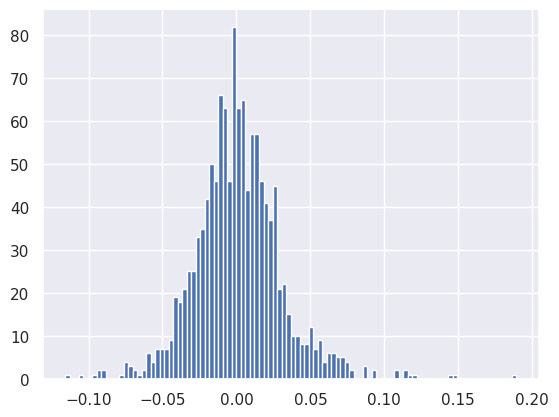

In [157]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

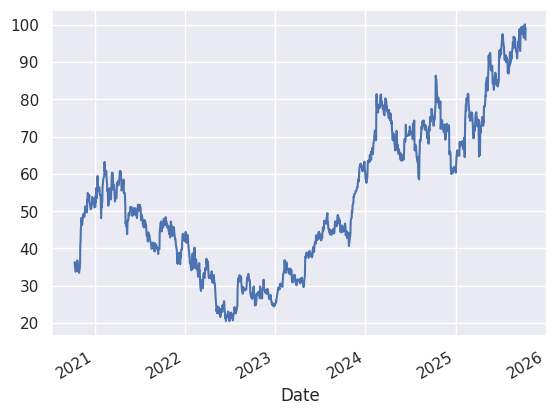

In [158]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [159]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-10-12,37.560,37.560,36.175,36.26,16569415,36.9100,NaN,NaN
2020-10-13,36.220,36.230,35.020,35.56,15463089,35.8900,36.26,-0.019305
2020-10-14,35.690,36.090,35.075,35.11,15402925,35.4000,35.56,-0.012655
2020-10-15,34.680,34.810,34.020,34.26,15449850,34.4700,35.11,-0.024210
2020-10-16,34.780,34.800,33.610,33.72,14904333,34.2500,34.26,-0.015762
...,...,...,...,...,...,...,...,...
2025-10-03,96.930,98.300,96.460,96.60,10556418,96.7650,96.61,-0.000104
2025-10-06,96.960,101.295,96.890,100.10,22760917,98.5300,96.60,0.036232
2025-10-07,100.130,100.690,97.000,97.80,12583609,98.9650,100.10,-0.022977


In [160]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-10-19,34.160,34.5900,34.0000,34.22,19278584,34.1900,33.72,0.014828
2020-10-20,34.530,36.7600,34.5300,36.31,29820702,35.4200,34.22,0.061075
2020-10-22,35.420,36.8900,34.9146,36.70,14243611,36.0600,35.20,0.042614
2020-10-23,36.500,36.9900,35.9238,36.75,15960599,36.6250,36.70,0.001362
2020-10-29,33.710,34.9350,33.3300,34.06,13735346,33.8850,33.65,0.012184
...,...,...,...,...,...,...,...,...
2025-09-22,99.000,101.9900,98.5000,99.39,29820118,99.1950,98.51,0.008933
2025-09-26,97.795,98.5298,97.0300,98.45,10356143,98.1225,97.60,0.008709
2025-09-29,99.360,100.2600,98.5850,99.57,16320890,99.4650,98.45,0.011376


In [161]:
df_positive.Daily_Change.mean()

np.float64(0.023027243377516982)

In [162]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-10-13,36.220,36.230,35.0200,35.56,15463089,35.8900,36.26,-0.019305
2020-10-14,35.690,36.090,35.0750,35.11,15402925,35.4000,35.56,-0.012655
2020-10-15,34.680,34.810,34.0200,34.26,15449850,34.4700,35.11,-0.024210
2020-10-16,34.780,34.800,33.6100,33.72,14904333,34.2500,34.26,-0.015762
2020-10-21,36.250,36.250,34.8751,35.20,19058727,35.7250,36.31,-0.030570
...,...,...,...,...,...,...,...,...
2025-09-30,99.590,99.750,96.6500,97.97,16793406,98.7800,99.57,-0.016069
2025-10-01,97.475,99.085,96.5700,96.61,16608459,97.0425,97.97,-0.013882
2025-10-03,96.930,98.300,96.4600,96.60,10556418,96.7650,96.61,-0.000104


In [163]:
 df_negative.Daily_Change.mean()

np.float64(-0.020521579933435095)

In [164]:
df.Close == df.High

,0
Date,
2020-10-12,False
2020-10-13,False
2020-10-14,False
2020-10-15,False
2020-10-16,False
...,...
2025-10-03,False
2025-10-06,False
2025-10-07,False


In [165]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [166]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147
2025-07-24,91.14,93.61,90.87,90.87,23446209,91.005,89.94,0.010340
2025-08-27,96.50,96.95,95.33,95.33,11364308,95.915,96.53,-0.012431


In [167]:
df.index > '2019-11-01'

array([ True,  True,  True, ...,  True,  True,  True])

In [168]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-10-12,37.560,37.560,36.175,36.26,16569415,36.9100,NaN,NaN
2020-10-13,36.220,36.230,35.020,35.56,15463089,35.8900,36.26,-0.019305
2020-10-14,35.690,36.090,35.075,35.11,15402925,35.4000,35.56,-0.012655
2020-10-15,34.680,34.810,34.020,34.26,15449850,34.4700,35.11,-0.024210
2020-10-16,34.780,34.800,33.610,33.72,14904333,34.2500,34.26,-0.015762
...,...,...,...,...,...,...,...,...
2025-10-03,96.930,98.300,96.460,96.60,10556418,96.7650,96.61,-0.000104
2025-10-06,96.960,101.295,96.890,100.10,22760917,98.5300,96.60,0.036232
2025-10-07,100.130,100.690,97.000,97.80,12583609,98.9650,100.10,-0.022977


In [169]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,


In [170]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,


In [171]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-10-12,37.560,37.560,36.175,36.26,16569415,36.9100,NaN,NaN
2020-10-13,36.220,36.230,35.020,35.56,15463089,35.8900,36.26,-0.019305
2020-10-14,35.690,36.090,35.075,35.11,15402925,35.4000,35.56,-0.012655
2020-10-15,34.680,34.810,34.020,34.26,15449850,34.4700,35.11,-0.024210
2020-10-16,34.780,34.800,33.610,33.72,14904333,34.2500,34.26,-0.015762
...,...,...,...,...,...,...,...,...
2025-10-03,96.930,98.300,96.460,96.60,10556418,96.7650,96.61,-0.000104
2025-10-06,96.960,101.295,96.890,100.10,22760917,98.5300,96.60,0.036232
2025-10-07,100.130,100.690,97.000,97.80,12583609,98.9650,100.10,-0.022977


In [172]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2021-05-03,55.1200,56.130,54.8400,54.85,13903303,54.98500,54.77,0.001461
2021-05-04,54.5200,54.720,52.0100,52.99,19336646,53.75500,54.85,-0.033911
2021-05-05,53.8700,53.870,50.6300,51.18,28232537,52.52500,52.99,-0.034157
2021-05-06,48.3900,49.810,45.7200,46.65,79242393,47.52000,51.18,-0.088511
2021-05-07,47.2200,48.600,46.5346,47.03,27933929,47.12500,46.65,0.008146
...,...,...,...,...,...,...,...,...
2025-05-23,87.2050,88.490,86.7000,87.75,17929659,87.47750,88.00,-0.002841
2025-05-27,89.1699,89.715,87.8900,89.00,17446940,89.08495,87.75,0.014245
2025-05-28,89.2850,89.880,88.1200,88.26,13810322,88.77250,89.00,-0.008315


In [173]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-12-01,50.000,51.4100,49.070,49.63,20619101,49.8150,49.66,-0.000604
2021-02-01,52.120,52.9000,51.350,52.76,15570904,52.4400,50.93,0.035932
2021-03-01,53.670,54.7600,53.300,54.40,18481137,54.0350,51.75,0.051208
2021-04-01,55.610,57.6300,54.810,57.60,18703397,56.6050,54.51,0.056687
2021-06-01,51.620,51.6600,49.840,50.98,16583752,51.3000,50.83,0.002951
2021-07-01,50.880,51.6000,50.020,50.59,17732585,50.7350,50.12,0.009377
2021-09-01,39.980,41.6650,39.870,40.62,27788584,40.3000,39.14,0.037813
2021-10-01,45.915,47.2500,45.790,47.05,25428283,46.4825,44.80,0.050223
2021-11-01,44.070,45.0250,43.650,44.36,20983925,44.2150,43.82,0.012323
